## Gaussian Mixture Model (GMM) Animation

✔ EM algorithm (E-step & M-step) visualization

✔ Covariance ellipses moving

✔ Responsibilities evolving

c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try d

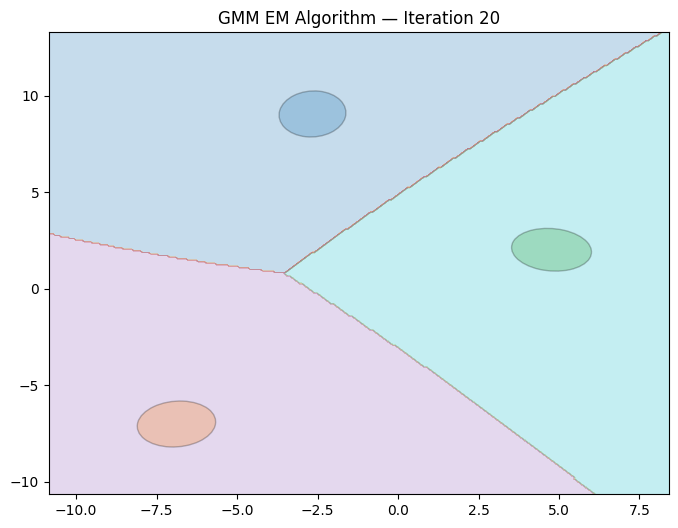

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Create GIF folder
os.makedirs("gifs", exist_ok=True)

# Generate data
X, _ = make_blobs(
    n_samples=300, centers=3,
    cluster_std=1.2, random_state=42
)

# Grid for soft responsibilities
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

colors = plt.cm.tab10(np.linspace(0, 1, 10))

# --- Save EM results in history ---
iterations = 20
history_means, history_covs, history_resp = [], [], []

gmm = GaussianMixture(
    n_components=3,
    covariance_type="full",
    max_iter=1,
    random_state=42
)

for _ in range(iterations):
    gmm.fit(X)
    resp = gmm.predict_proba(grid).reshape(xx.shape + (3,))
    history_resp.append(resp)
    history_means.append(gmm.means_.copy())
    history_covs.append(gmm.covariances_.copy())

# --- Animation ---
fig, ax = plt.subplots(figsize=(8, 6))
ellipses = []
contours = []

def draw_ellipse(mean, cov, color):
    U, s, _ = np.linalg.svd(cov)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    ell = Ellipse(
        xy=mean,
        width=width,
        height=height,
        angle=angle,
        facecolor=color,
        alpha=0.25,
        edgecolor="black"
    )
    ax.add_patch(ell)
    return ell

scatter = ax.scatter(X[:, 0], X[:, 1], s=15, color="black")

def update(i):
    global ellipses

    # ✅ Remove ALL old contours (safe for all Matplotlib versions)
    while ax.collections:
        ax.collections[-1].remove()

    # Remove old ellipses
    for e in ellipses:
        e.remove()
    ellipses = []

    means = history_means[i]
    covs = history_covs[i]
    resp = history_resp[i]

    # Soft cluster regions
    cluster_region = np.argmax(resp, axis=2)
    ax.contourf(xx, yy, cluster_region, alpha=0.25, cmap="tab10")

    # Draw ellipses
    for k in range(3):
        ell = draw_ellipse(means[k], covs[k], colors[k])
        ellipses.append(ell)

    ax.set_title(f"GMM EM Algorithm — Iteration {i+1}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

ani = FuncAnimation(fig, update, frames=iterations, interval=500)

ani.save("gifs/gmm_em_animation.gif", writer="pillow")

plt.show()
